<a href="https://colab.research.google.com/github/justin-hsieh/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean_var_std(list):
  mean = sum(list)/len(list)
  
  varlist = []
  for i in list:
    value = ((i-mean)**2)
    varlist.append(value)
    total = sum(varlist)
  variance = total/len(list)
  
  standard_dev = (variance)**(1/2)
  
  return print("Mean = {:.2f}, Variance = {:.2f}, Standard Dev = {:.2f}".format(mean, variance, standard_dev))

mean_var_std(sales)

Mean = 3052.71, Variance = 183761.06, Standard Dev = 428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [9]:
customers = [127,80,105,92,120,115,93]
custsales = pd.DataFrame(zip(sales,customers))
custsales.columns = ['Sales','Customers']
custsales.head()

,Sales,Customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [10]:
custsales.cov()

,Sales,Customers
Sales,214387.904762,7604.357143
Customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
def std(list):
  mean = sum(list)/len(list)
  
  varlist = []
  for i in list:
    value = ((i-mean)**2)
    varlist.append(value)
    total = sum(varlist)
  variance = total/len(list)
  
  standard_dev = (variance)**(1/2)
  
  return standard_dev
  

In [14]:
sales_std = std(sales)
cust_std = std(customers)
print(sales_std)
cust_std

428.67360686714756


15.792015549069118

In [18]:
r = custsales.cov()/(sales_std*cust_std)
r

,Sales,Customers
Sales,31.669118,1.123306
Customers,1.123306,0.042979


In [16]:
custsales.corr()

,Sales,Customers
Sales,1.000000,0.962834
Customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 16 columns):
Unnamed: 0          1310 non-null int64
pclass              1309 non-null float64
survived            1309 non-null float64
name                1309 non-null object
sex                 1309 non-null object
age                 1310 non-null float64
sibsp               1309 non-null float64
parch               1309 non-null float64
ticket              1309 non-null object
fare                1308 non-null float64
cabin               295 non-null object
embarked            1310 non-null object
boat                486 non-null object
body                121 non-null float64
home.dest           745 non-null object
has_cabin_number    1310 non-null int64
dtypes: float64(7), int64(2), object(7)
memory usage: 163.8+ KB


In [5]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [7]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

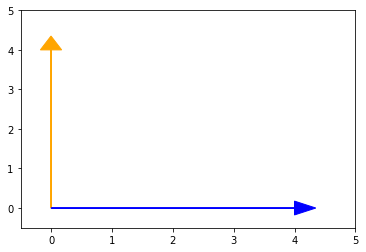

In [26]:
v1 = [0,4]
v2 = [4,0]

plt.arrow(0,0, v1[0], v1[1],head_width=.35, head_length=0.35, color ='orange')
plt.arrow(0,0, v2[0], v2[1],head_width=.35, head_length=0.35, color ='blue')
plt.xlim(-.5,5)          
plt.ylim(-.5,5)

plt.show()

Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

They are not orthogonal because the dot product is not 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [32]:
c = [2,-15,6,20]
ctrans = np.transpose(c)

c_dist = ((4)**2 + (-15)**2 + (6)**2 + (20)**2)**(1/2)
c_dist
print('||c||^2 = ', c_dist**2)

||c||^2 =  677.0000000000001


In [30]:
cdot = np.dot(c,c)
cdot

665

In [33]:
ctc = np.matmul(ctrans, c)
ctc

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d = $7\hat i\ $ +  $12\hat j\ $

e = $2\hat i\ $ +  $11\hat j\ $ + $-8\hat k\$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [34]:
f = [4,12,11,9,2]

fdist = (16 + 144+121+81+4)**(1/2)
fdist

19.131126469708992

In [41]:
b_hat = np.multiply((1/fdist),f)
b_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

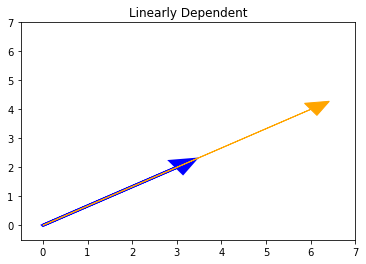

In [50]:
s1 = [3, 2]
s2 = np.multiply(2,s1)

plt.arrow(0,0, s1[0], s1[1], linewidth=3, head_width=.5, head_length=0.5, color ='blue')
plt.arrow(0,0, s2[0], s2[1], linewidth=1, head_width=.5, head_length=0.5, color ='orange')

plt.xlim(-.5,7)          
plt.ylim(-.5,7)
plt.title("Linearly Dependent")
plt.show()

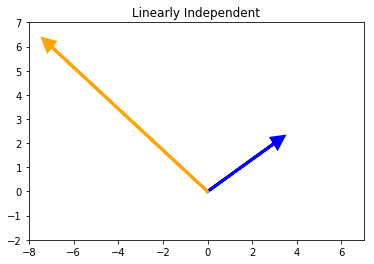

In [56]:
s3 = [-7,6]

plt.arrow(0,0, s1[0], s1[1], linewidth=3, head_width=.5, head_length=0.5, color ='blue')
plt.arrow(0,0, s3[0], s3[1], linewidth=3, head_width=.5, head_length=0.5, color ='orange')

plt.xlim(-8,7)          
plt.ylim(-2,7)
plt.title("Linearly Independent")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = [1,2]
h = [4,8]

{g,h} = c1*g + c2*h
S = R^2

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
{l,m,n} = c1*l + c2*m + c3*n
S = R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



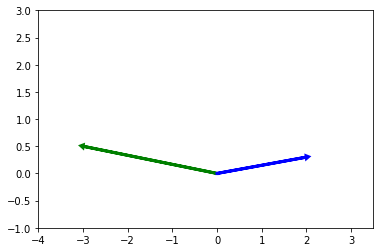

In [59]:
a = [-3,.5] 
b = [2, .3]

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.xlim(-4,3.5)          
plt.ylim(-1,3)


plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors that are linearly independent and span a vector space form a basis for some vector space R^2

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [57]:
p = [[1,2,3],[-1,0,7],[4,8,2]]
 # add 1 times the 1st row to the 2nd row
p1 = [[1,2,3], [0,2,10], [4,8,2]]

# Add -4 times the 1st row to the 3rd row
p2 = [[1,2,3], [0,2,10], [0,0,-10]]

# multiply second row by 1/2
p3 = [[1,2,3], [0,1,5], [0,0,-10]]

# Multiply 3rd row by -1/10
p4 = [[1,2,3], [0,1,5], [0,0,1]]

# add -5 times the 3rd row to the 2nd row
p5 = [[1,2,3], [0,1,0], [0,0,1]]

# add -3 times the 3rd row to the 1st row
p6 = [[1,2,0], [0,1,0], [0,0,1]]

# add -2 times the 2nd row to the 1st row
p7 = [[1,0,0], [0,1,0], [0,0,1]]
print('Rank = 3 because there are 3 non-zero rows')

Rank = 3 because there are 3 non-zero rows


## 7.2 What does the rank of a matrix tell us?

Rank tells you the maximum number of linearly independent column vectors that are in a matrix and/or the maximum number of linearly independent row vectors in the matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

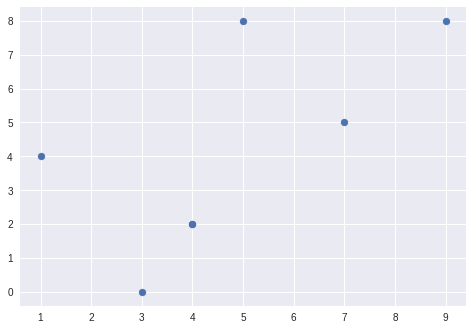

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()